<a href="https://colab.research.google.com/github/Santy2710/LR_Delivery_Time_Estimation/blob/main/LR_Delivery_Time_Estimation_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Order Delivery Time Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [ ]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [ ]:
# Importing the file porter_data_1.csv
df = pd.read_csv('/content/drive/MyDrive/Linear_Regression/porter_data_1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [ ]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [ ]:
# Convert categorical features to category type
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')
df['market_id'] = df['market_id'].astype('category')

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [ ]:
# Calculate time taken in minutes

df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [ ]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour_of_day'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['isWeekend'] = df['isWeekend'].astype('category')

In [ ]:
# Drop unnecessary columns
df = df.drop(['created_at', 'actual_delivery_time', 'day_of_week'], axis=1)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [ ]:
# Define target variable (y) and features (X)
y = df['time_taken']
X = df.drop('time_taken', axis=1)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [ ]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(include='category').columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour_of_day']
Categorical columns: ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

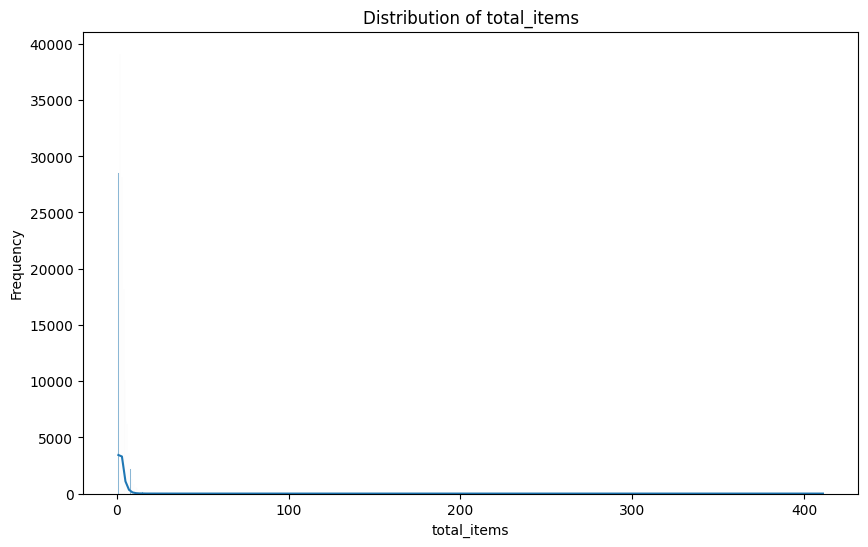

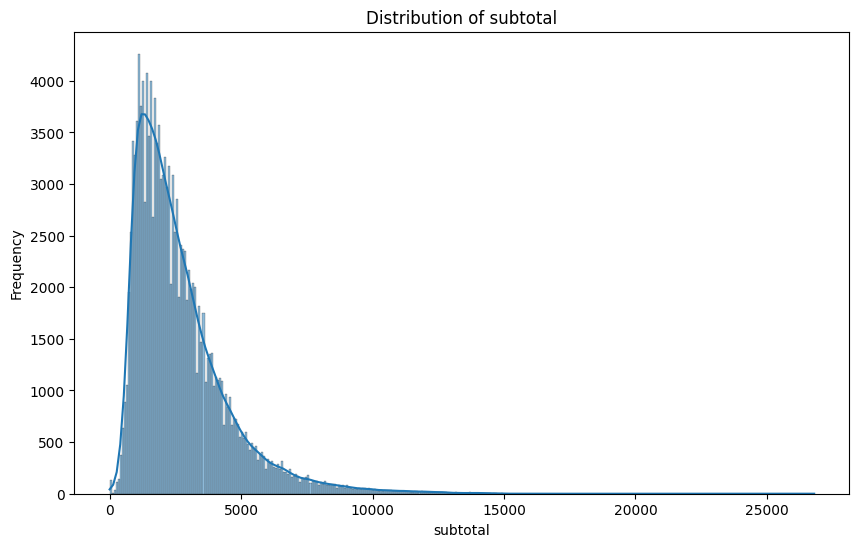

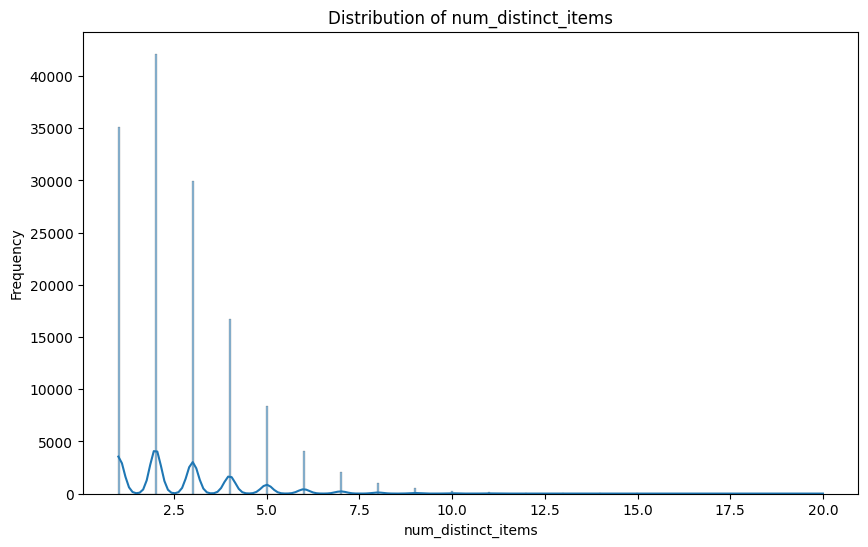

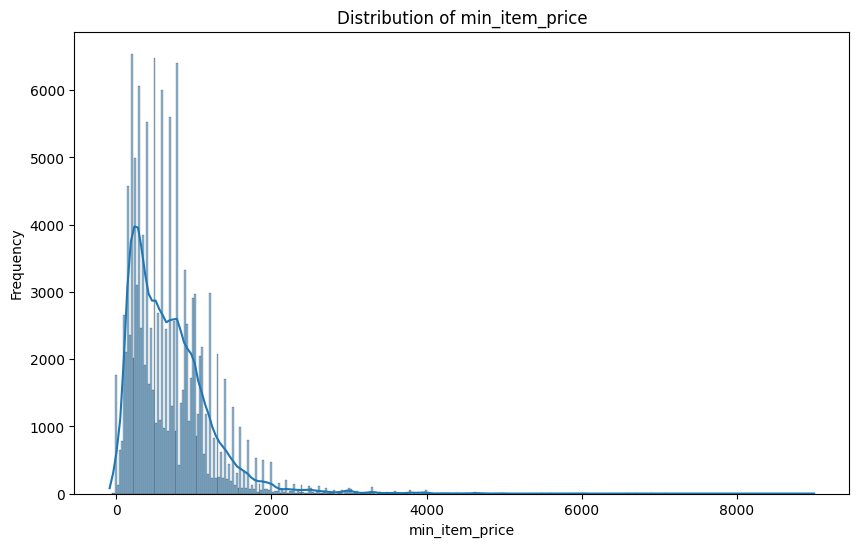

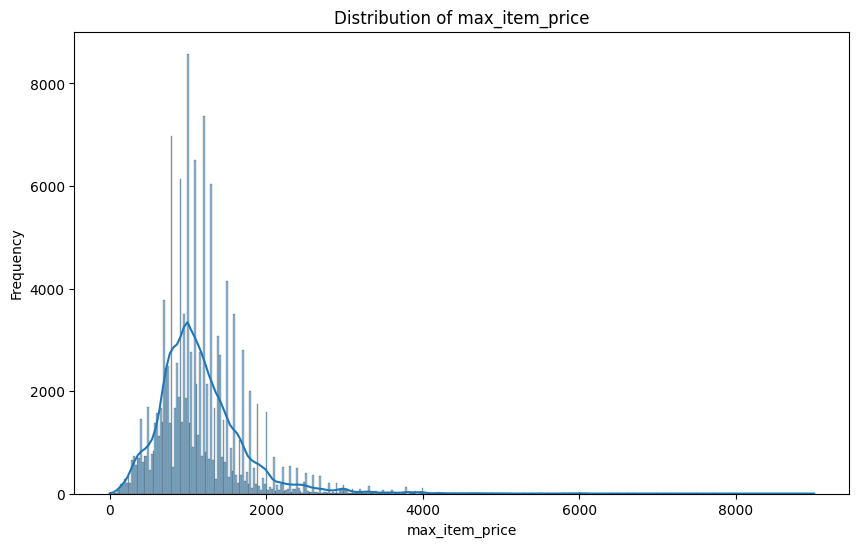

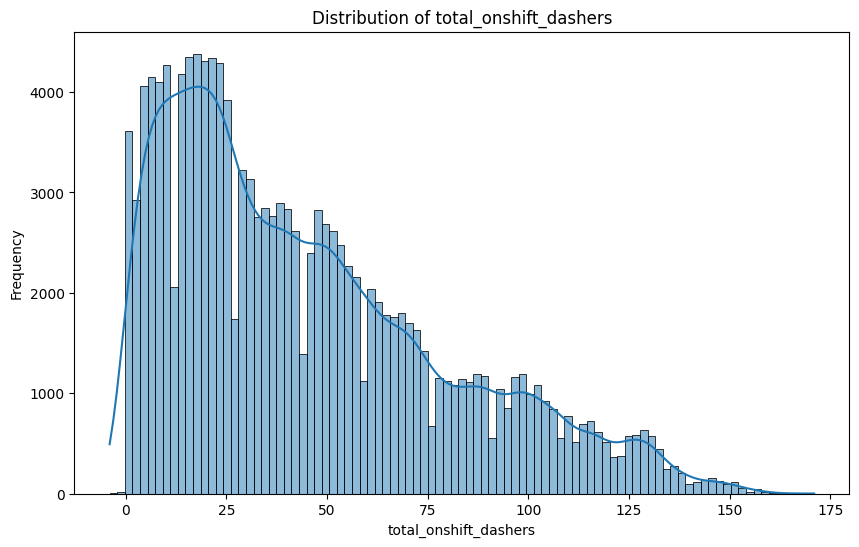

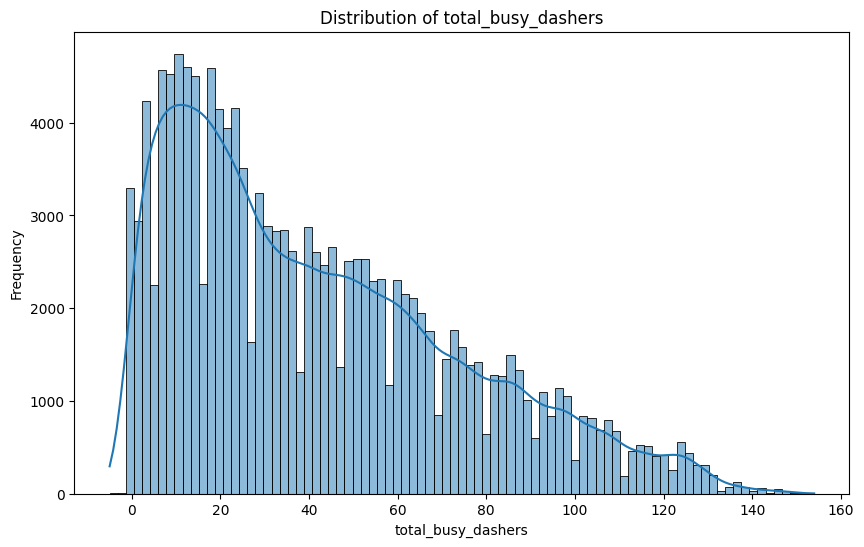

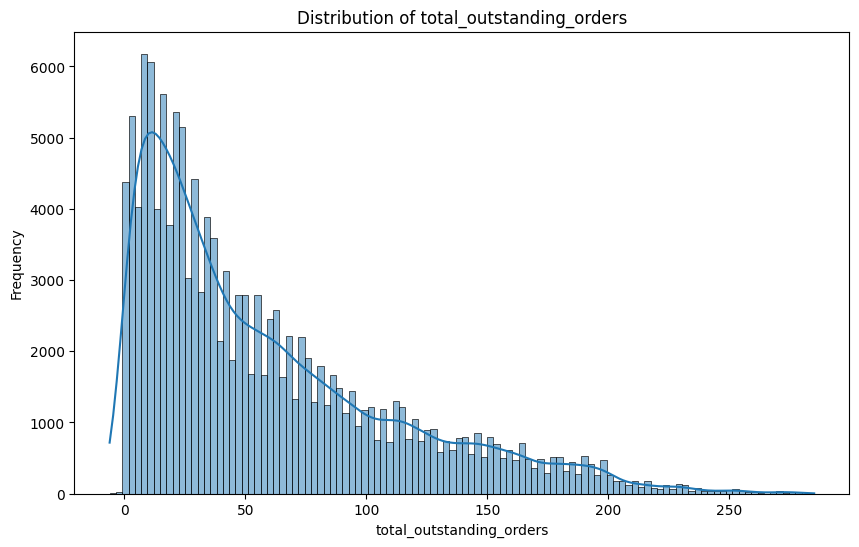

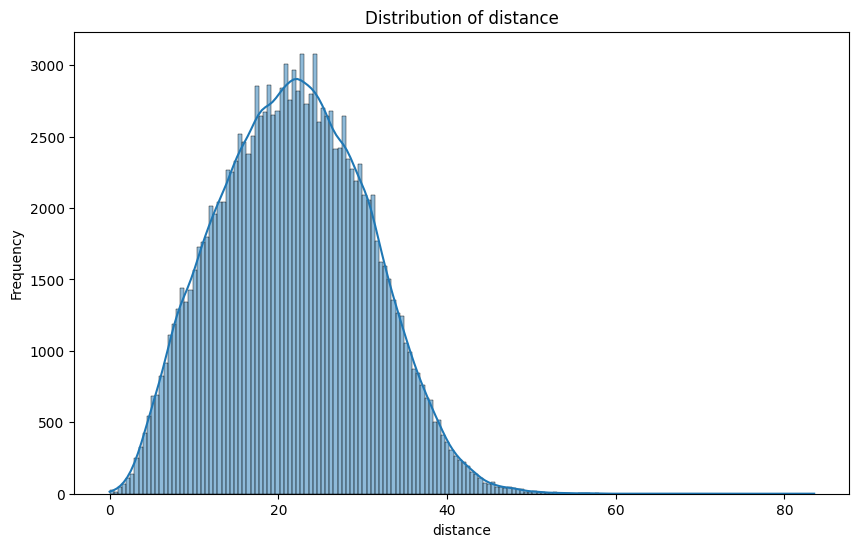

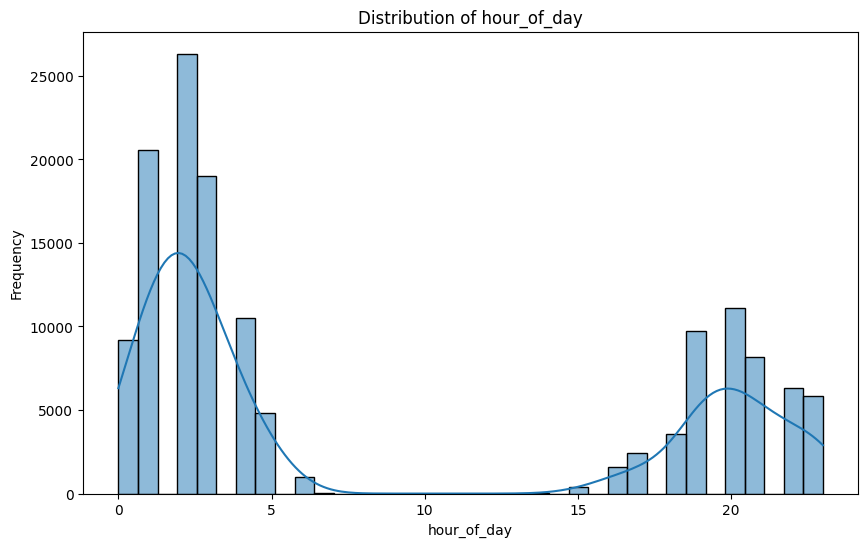

In [ ]:
# Plot distributions for all numerical columns

import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

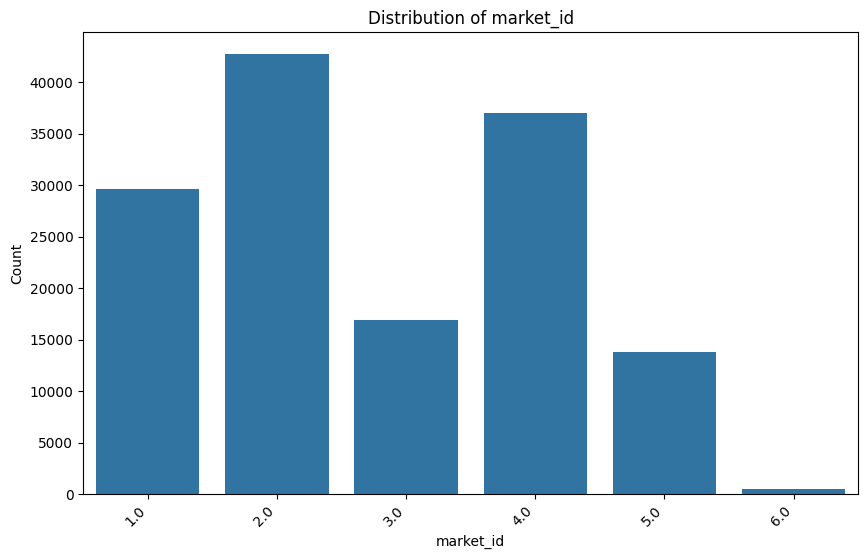

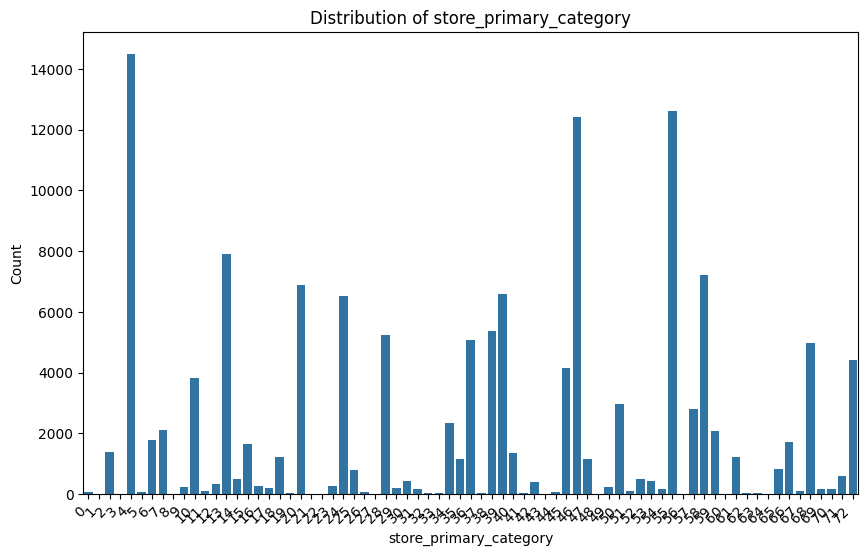

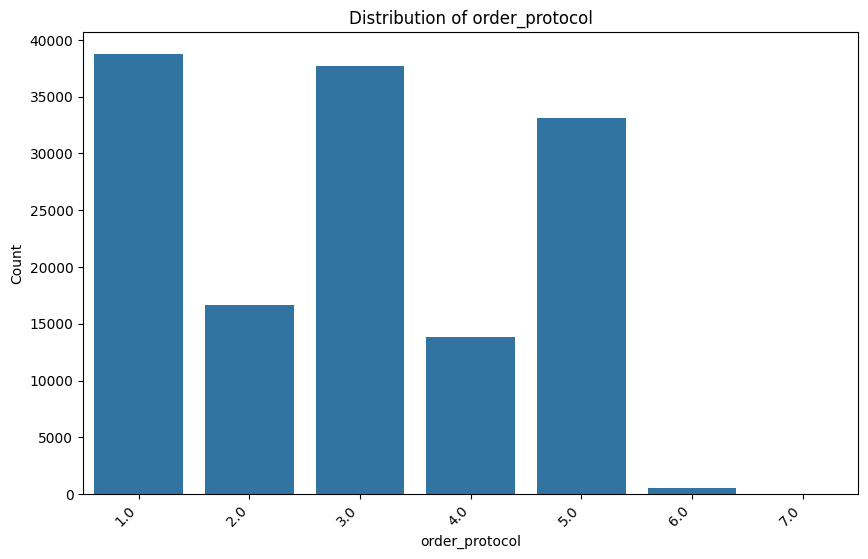

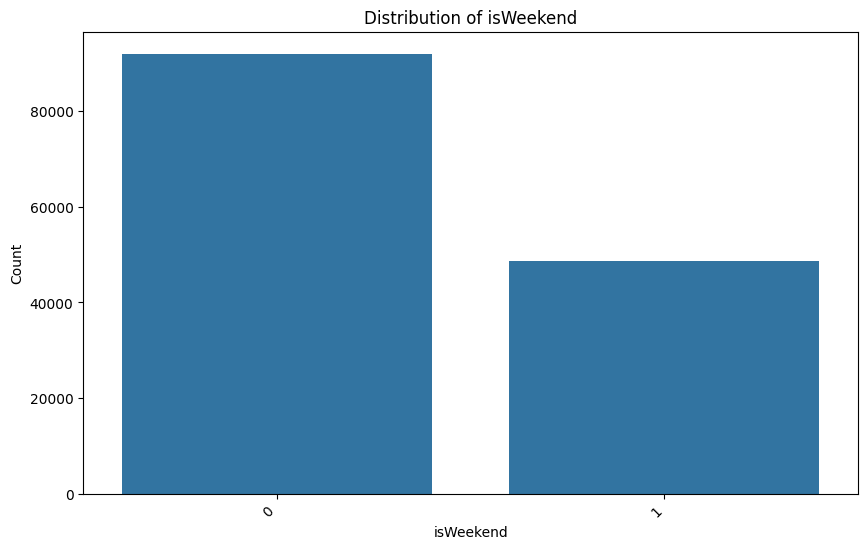

In [ ]:
# Distribution of categorical columns

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=X_train, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

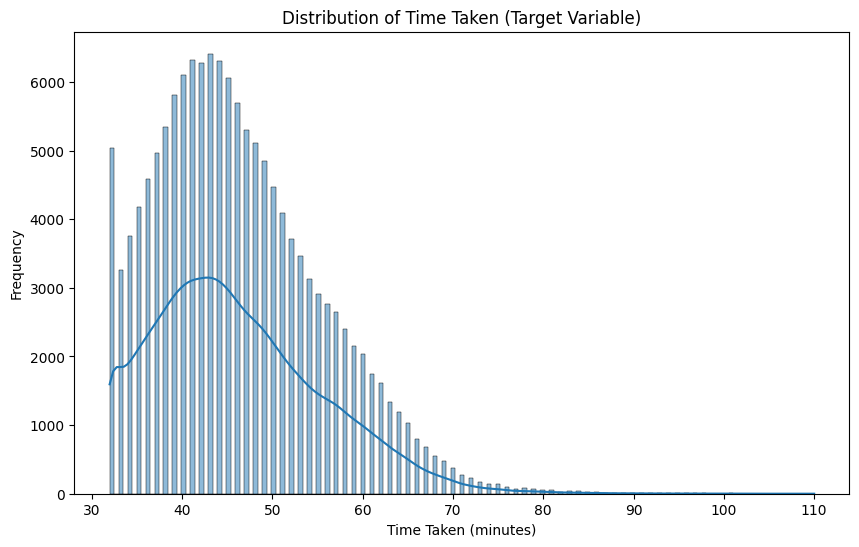

In [ ]:
# Distribution of time_taken
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of Time Taken (Target Variable)')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

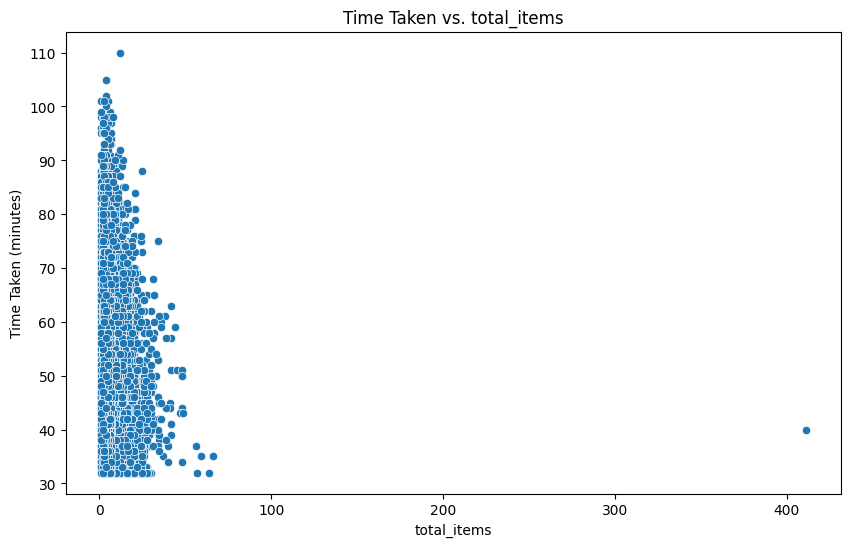

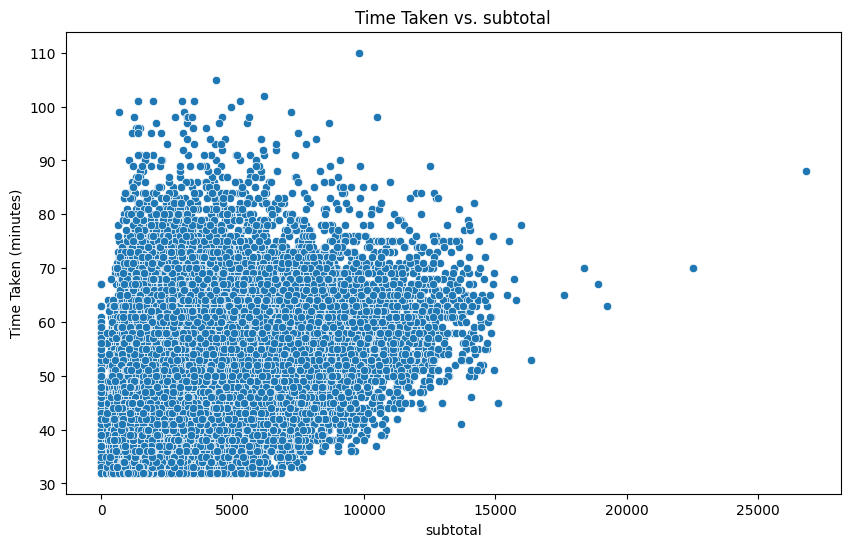

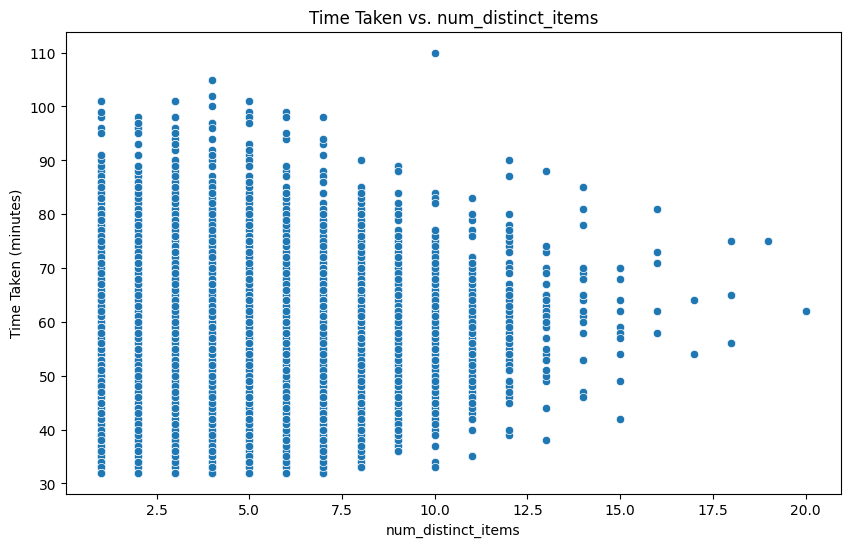

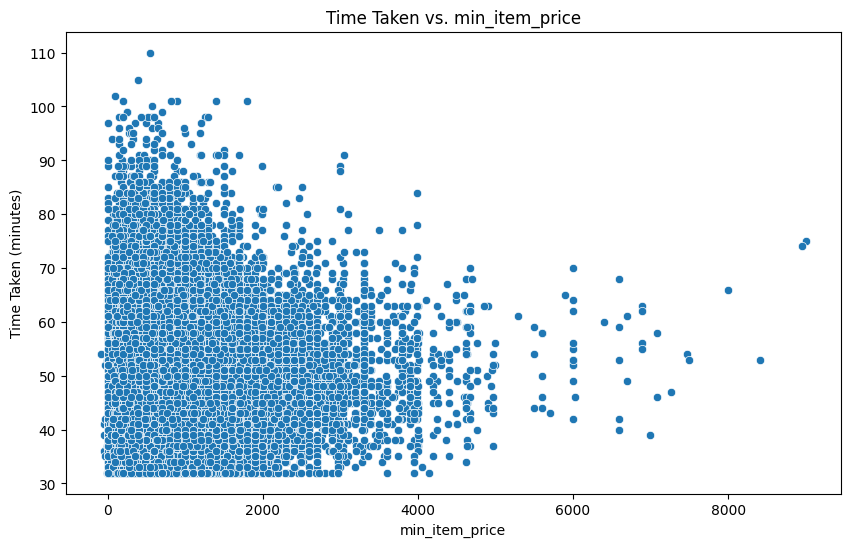

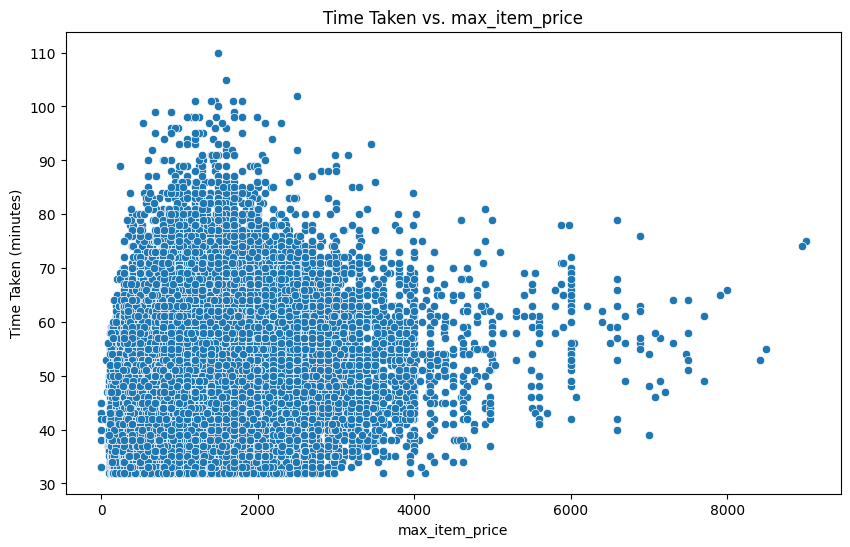

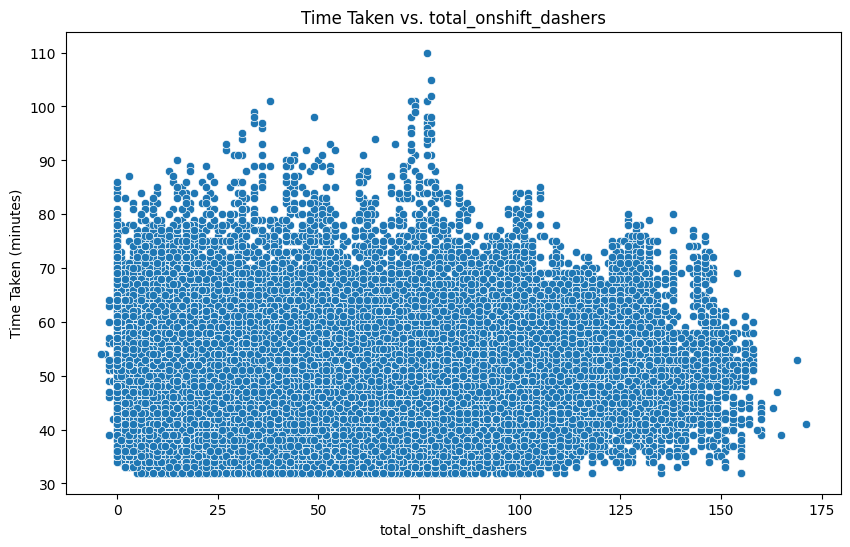

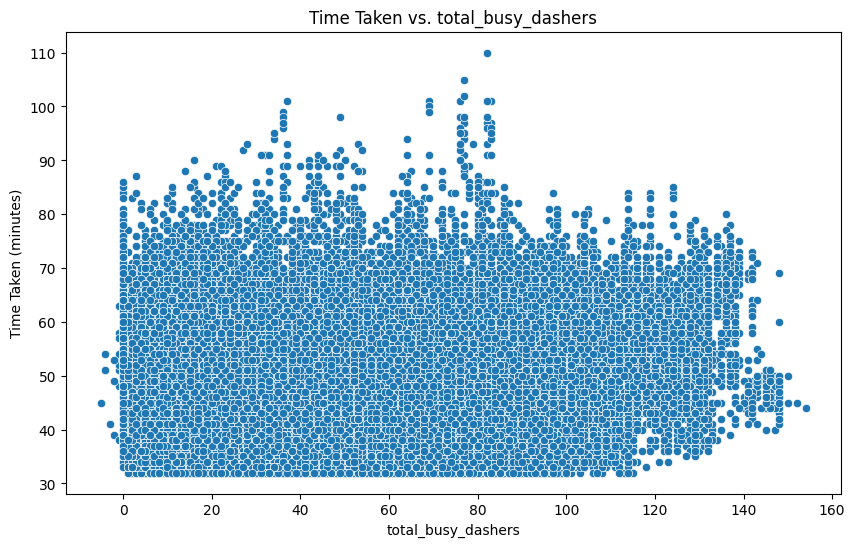

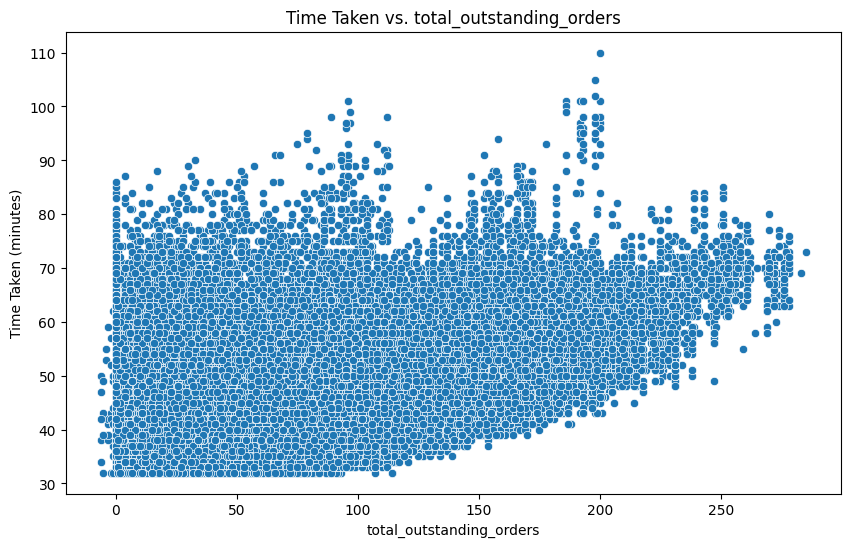

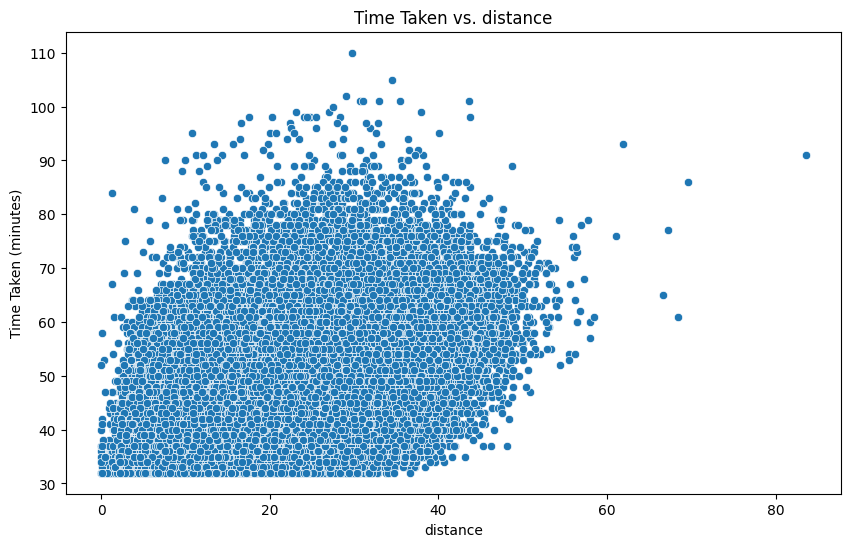

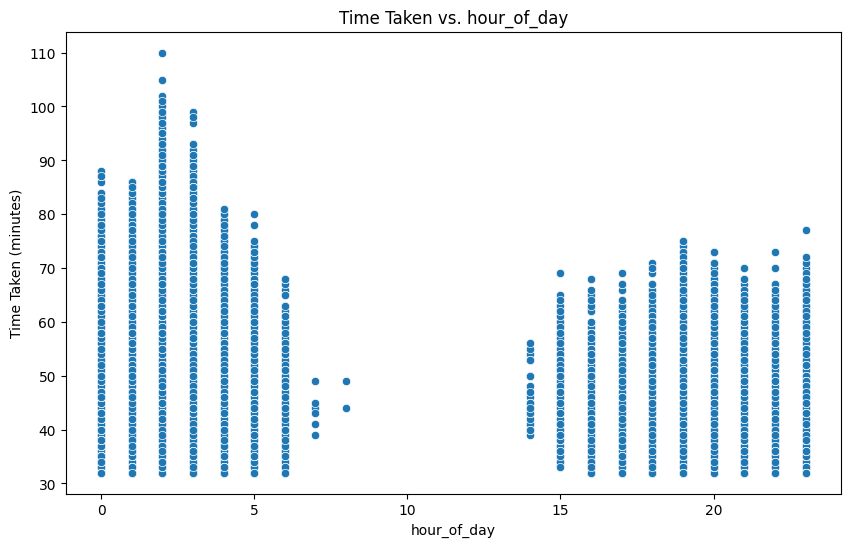

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features

# Scatter plots for numerical features vs. time_taken
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=X_train, x=col, y=y_train)
    plt.title(f'Time Taken vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')
    plt.show()

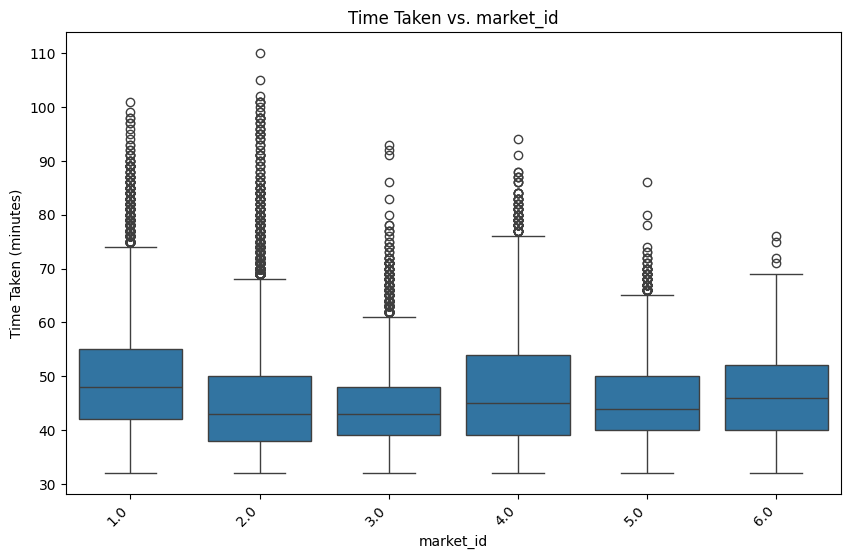

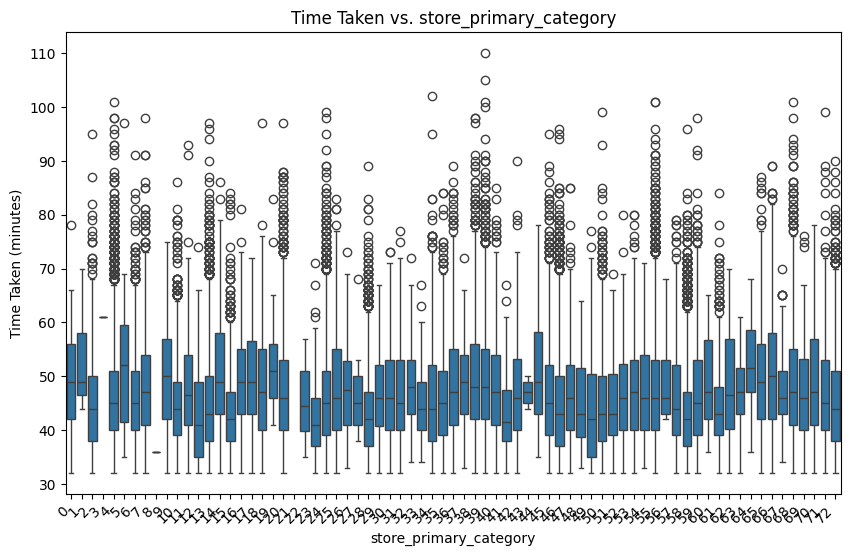

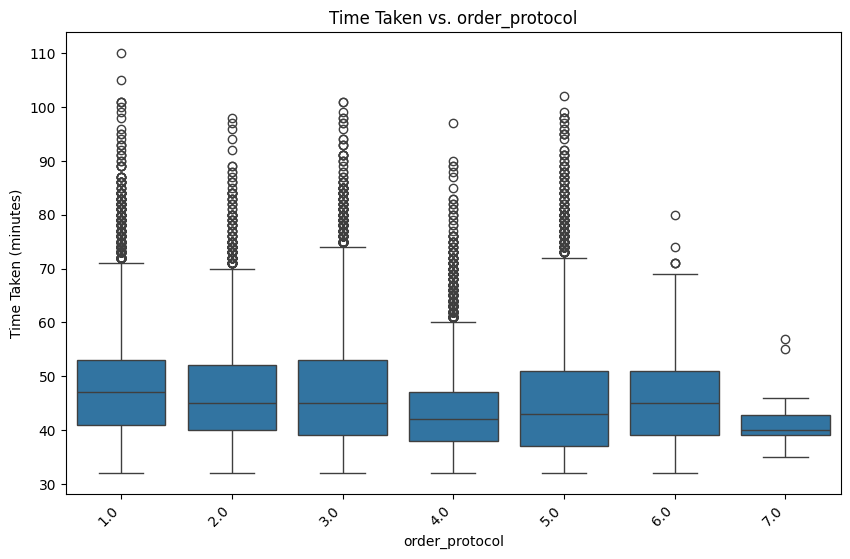

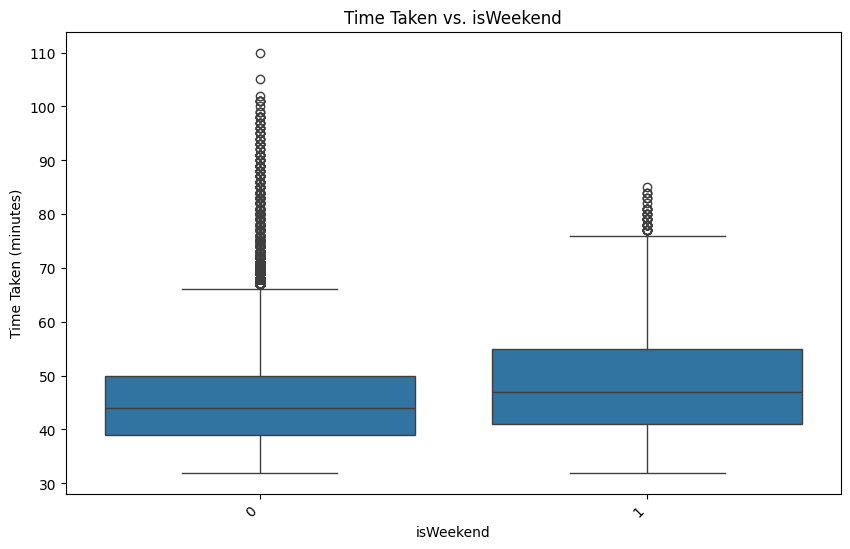

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=X_train, x=col, y=y_train)
    plt.title(f'Time Taken vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

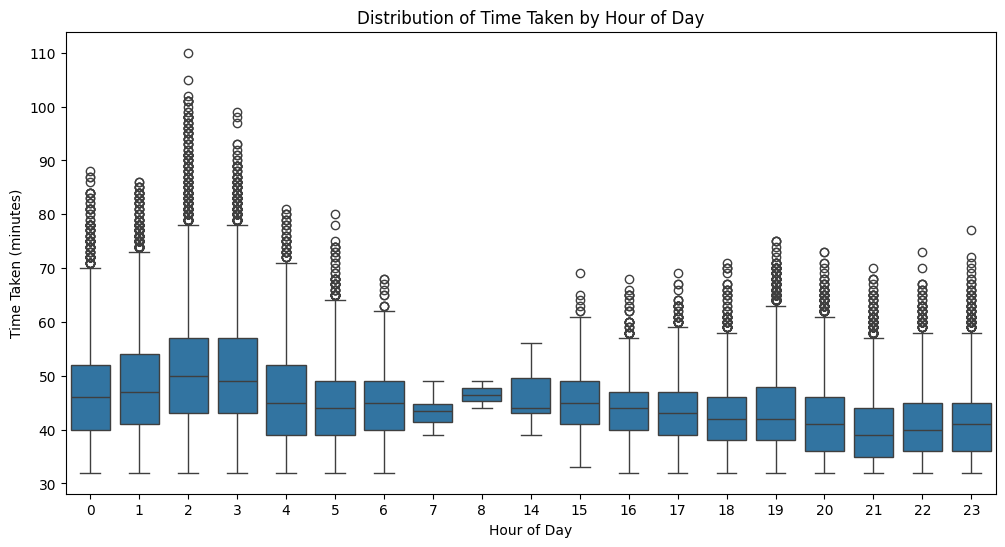

In [ ]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train.assign(time_taken=y_train), x='hour_of_day', y='time_taken')
plt.title('Distribution of Time Taken by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Time Taken (minutes)')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

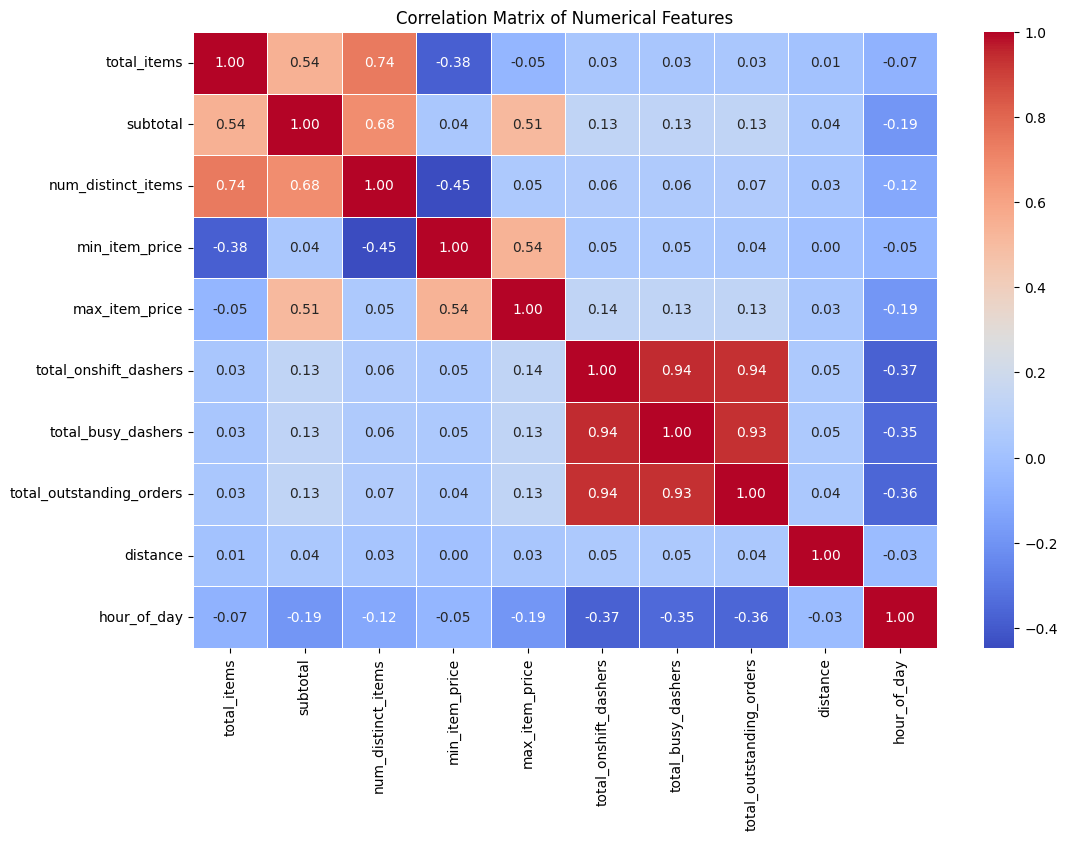

In [ ]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize=(12, 8))
correlation_matrix = X_train[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
# Drop 3-5 weakly correlated columns from training dataset

to_drop = ['min_item_price', 'max_item_price', 'num_distinct_items']
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)
print("Remaining columns in X_test:", X_test.columns.tolist())

Remaining columns in X_test: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour_of_day', 'isWeekend']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

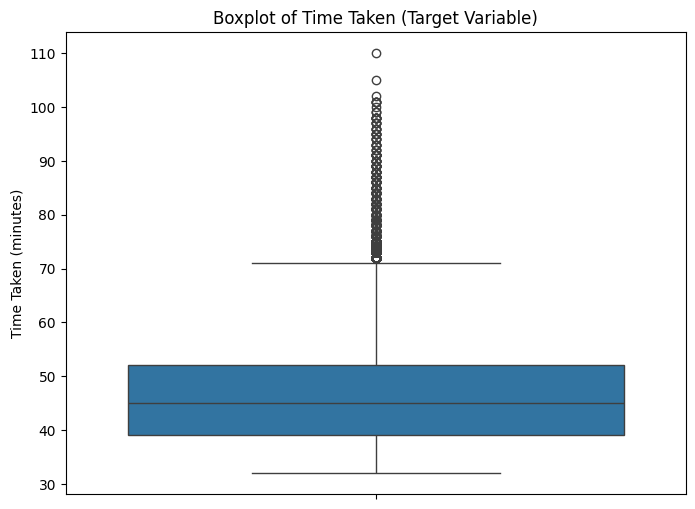

In [ ]:
# Boxplot for time_taken
plt.figure(figsize=(8, 6))
sns.boxplot(y=y_train) # Use y for a vertical boxplot
plt.title('Boxplot of Time Taken (Target Variable)')
plt.ylabel('Time Taken (minutes)')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [ ]:
#Handle Outliers

# Identify numerical columns again in case they changed after dropping some
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# Combine X_train and y_train for outlier handling
train_data = pd.concat([X_train[numerical_cols], y_train], axis=1)
numerical_cols_with_target = train_data.columns.tolist()

# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Apply outlier removal to each numerical column
print("Shape of training data before outlier removal:", train_data.shape)
for col in numerical_cols_with_target:
    train_data = remove_outliers_iqr(train_data, col)

print("Shape of training data after outlier removal:", train_data.shape)

# Separate features and target again
X_train_cleaned = train_data.drop('time_taken', axis=1)
y_train_cleaned = train_data['time_taken']

# Now, apply the same outlier handling to the test set,
# using the bounds calculated from the training data
test_data = pd.concat([X_test[X_train_cleaned.columns.tolist()], y_test], axis=1) # Ensure same columns as cleaned training

def filter_outliers_test(df, train_df, column):
    Q1_train = train_df[column].quantile(0.25) # Use train data bounds
    Q3_train = train_df[column].quantile(0.75)
    IQR_train = Q3_train - Q1_train

    lower_bound_train = Q1_train - 1.5 * IQR_train
    upper_bound_train = Q3_train + 1.5 * IQR_train

    # Filter out the outliers
    df_filtered = df[(df[column] >= lower_bound_train) & (df[column] <= upper_bound_train)]
    return df_filtered

print("Shape of test data before outlier handling:", test_data.shape)
for col in numerical_cols_with_target:
     # Only filter columns that exist in the cleaned training data
    if col in test_data.columns:
        test_data = filter_outliers_test(test_data, train_data, col) # Use train_data to get bounds

print("Shape of test data after outlier handling:", test_data.shape)

X_test_cleaned = test_data.drop('time_taken', axis=1)
y_test_cleaned = test_data['time_taken']


Shape of training data before outlier removal: (140621, 8)
Shape of training data after outlier removal: (121610, 8)
Shape of test data before outlier handling: (35156, 8)
Shape of test data after outlier handling: (29557, 8)


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = X_test_cleaned.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_test_cleaned.select_dtypes(include='category').columns.tolist()

print("Numerical columns (Test Data):", numerical_cols)
print("Categorical columns (Test Data):", categorical_cols)

Numerical columns (Test Data): ['total_items', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour_of_day']
Categorical columns (Test Data): []


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

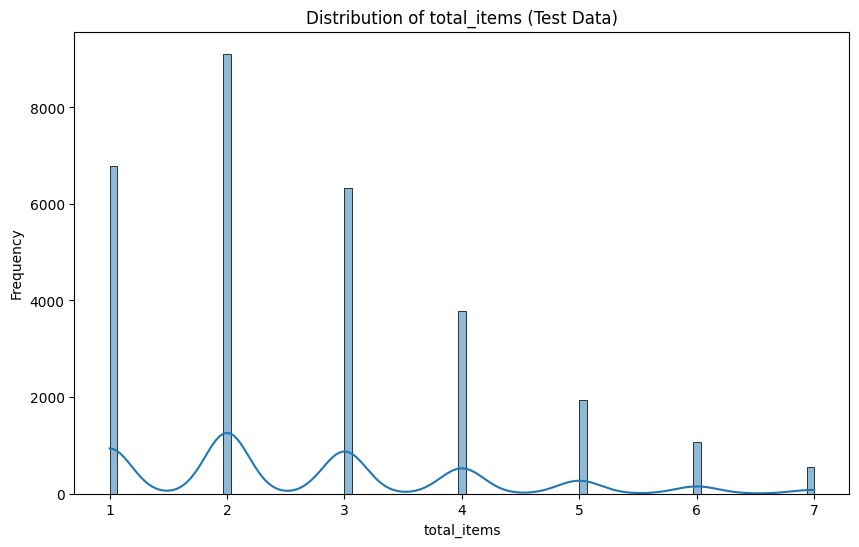

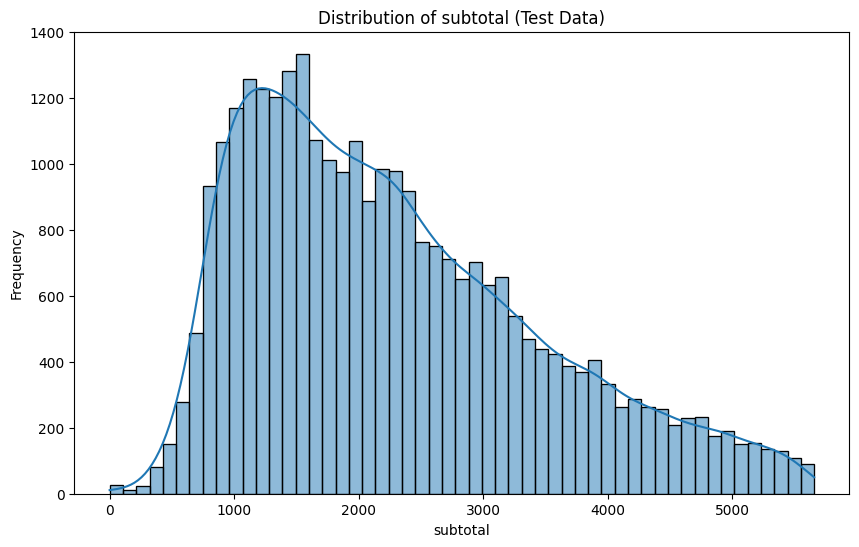

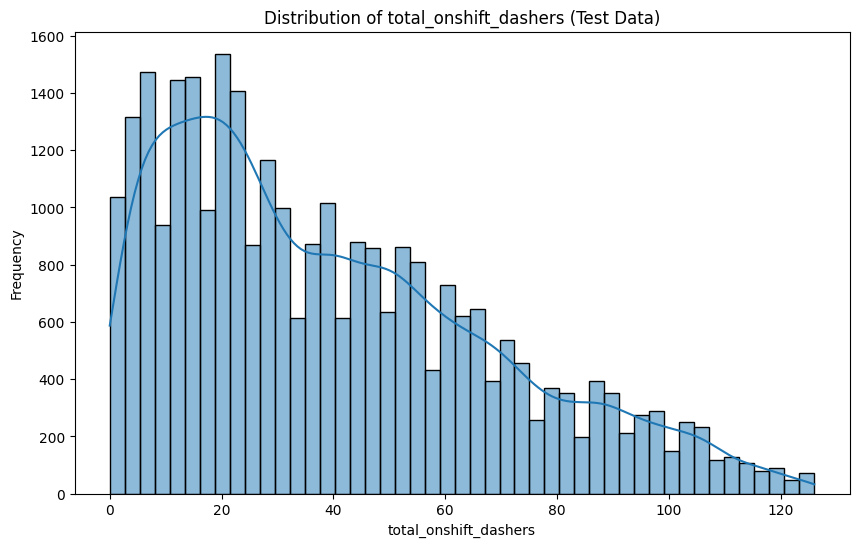

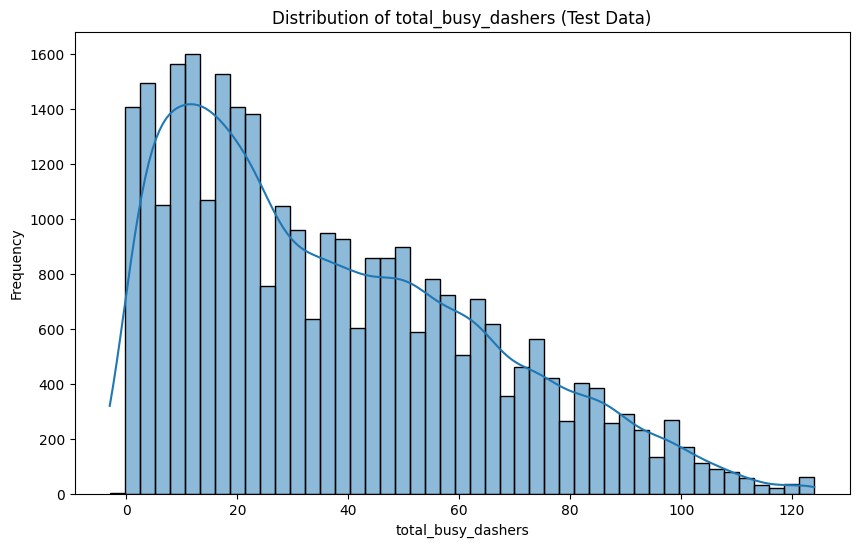

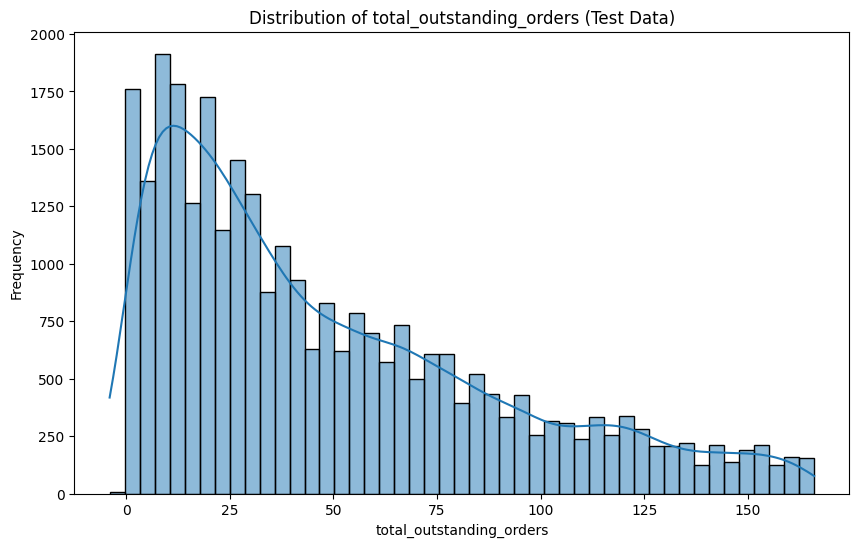

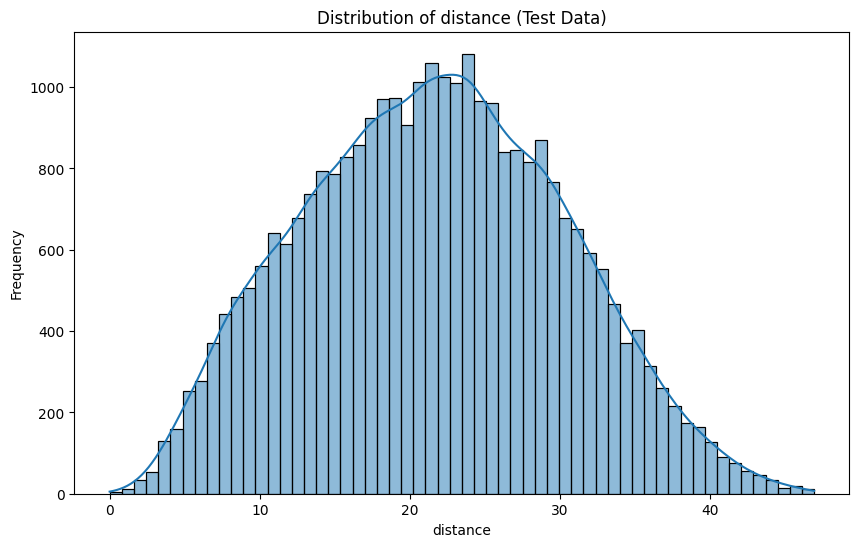

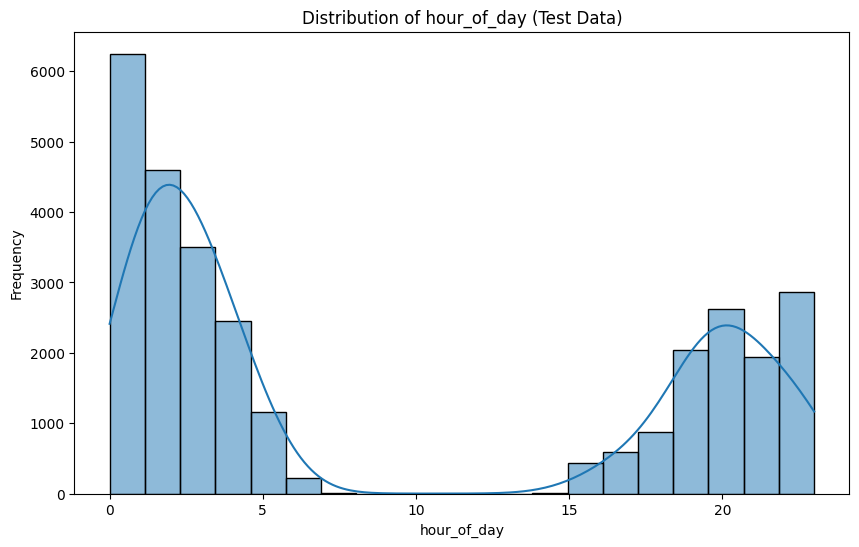

In [ ]:
# Plot distributions for all numerical columns

import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_test_cleaned[col], kde=True)
    plt.title(f'Distribution of {col} (Test Data)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=X_test_cleaned, x=col)
    plt.title(f'Distribution of {col} (Test Data)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

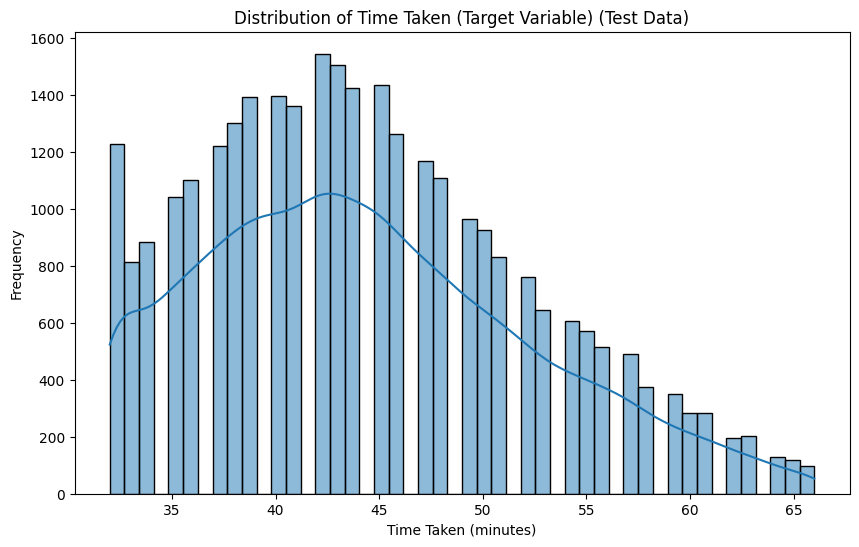

In [ ]:
# Distribution of time_taken
plt.figure(figsize=(10, 6))
sns.histplot(y_test_cleaned, kde=True)
plt.title('Distribution of Time Taken (Target Variable) (Test Data)')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

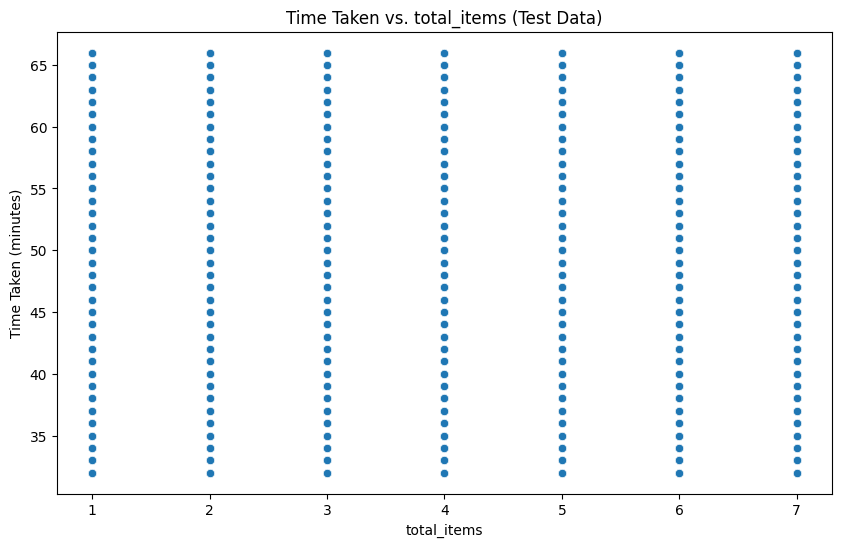

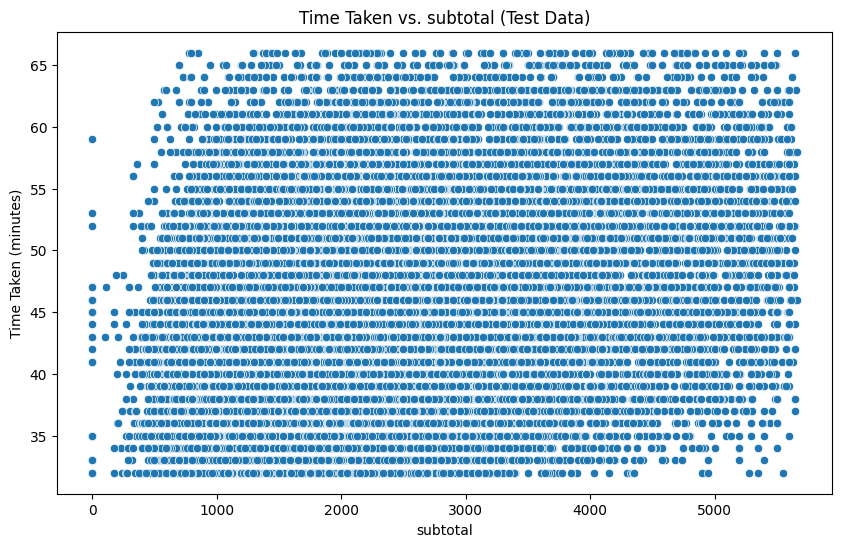

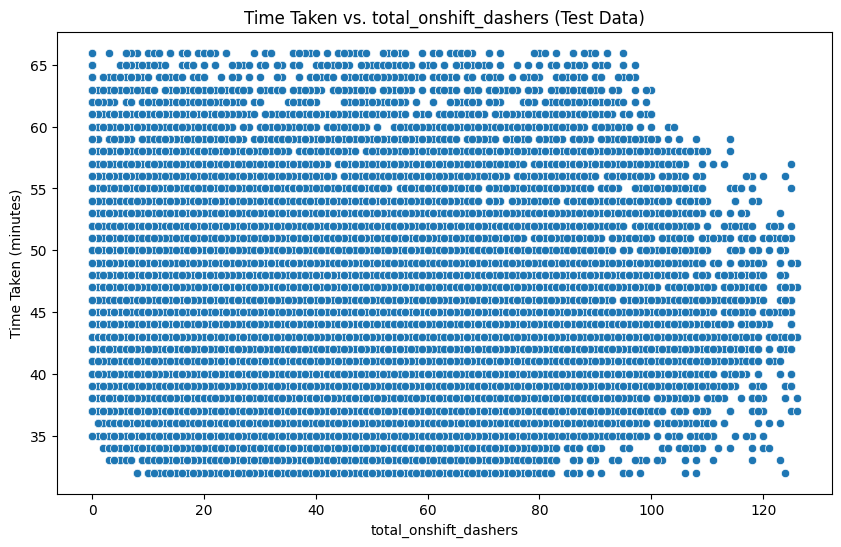

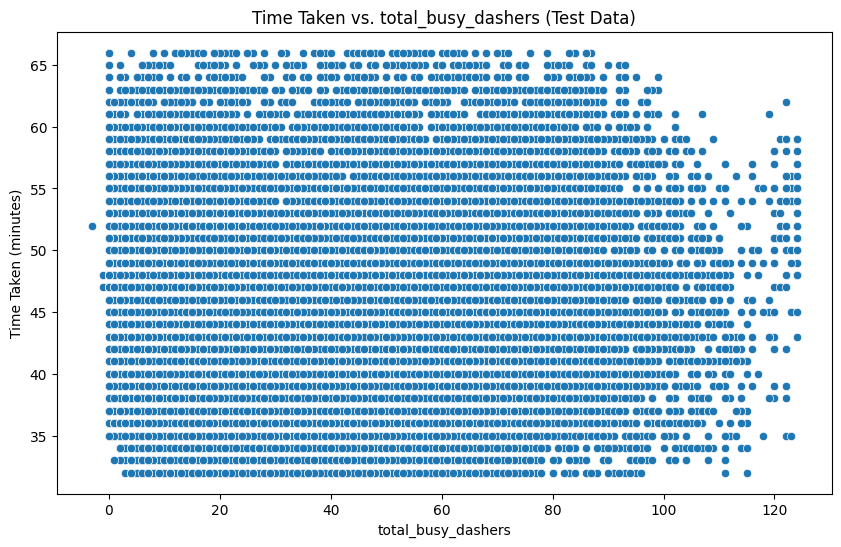

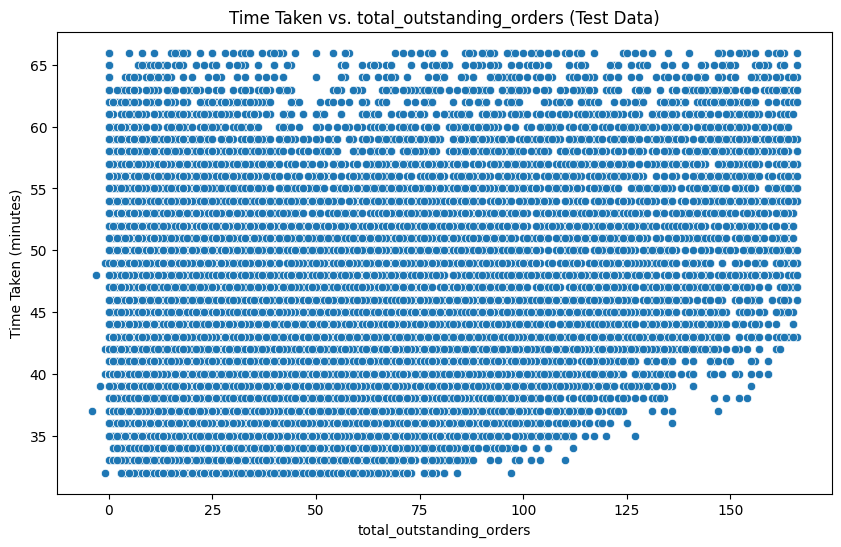

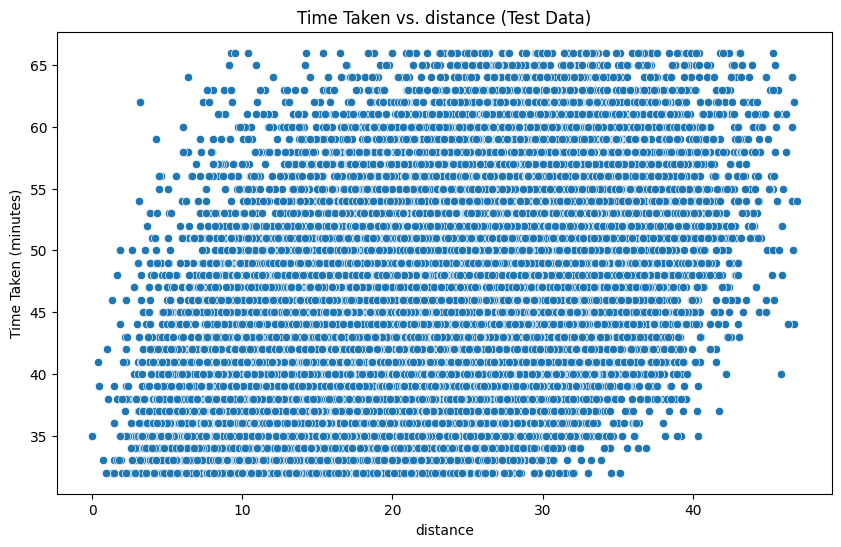

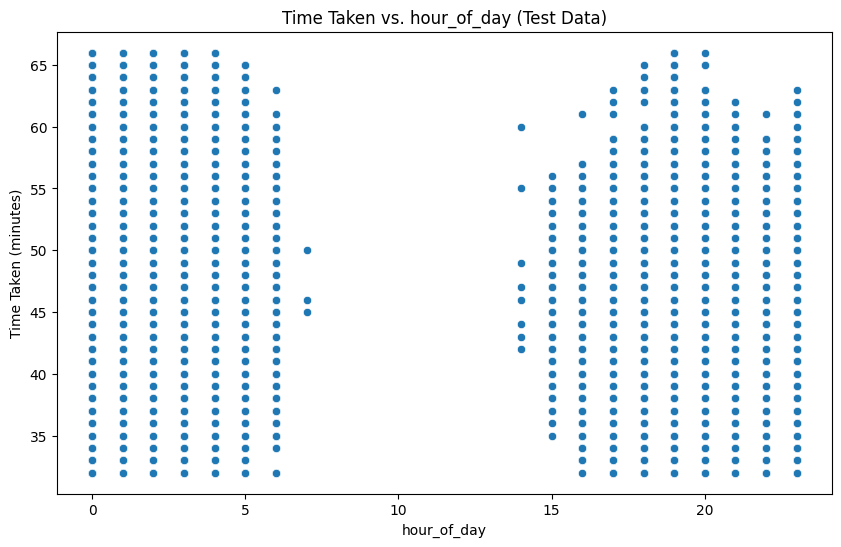

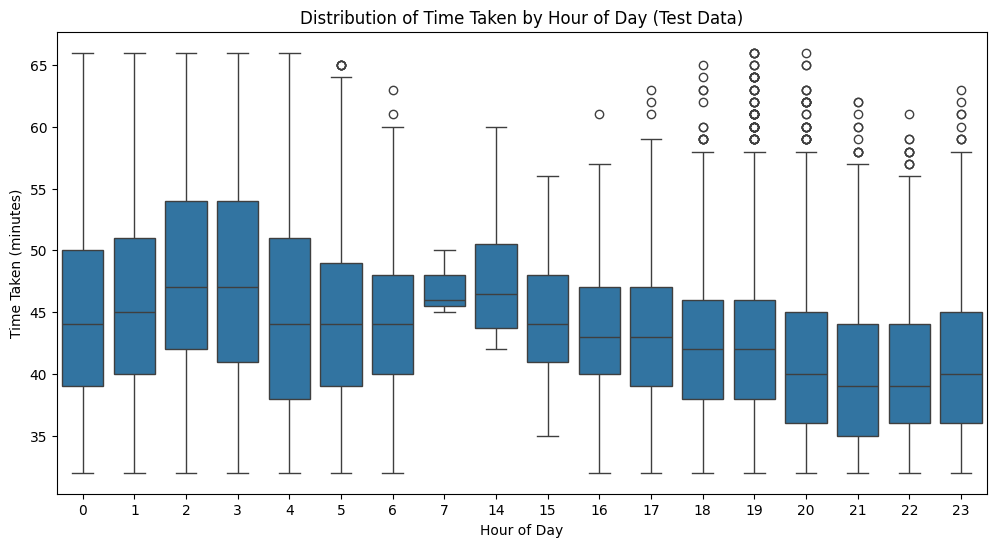

In [ ]:
# Drop the weakly correlated columns from training dataset

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=X_test_cleaned, x=col, y=y_test_cleaned)
    plt.title(f'Time Taken vs. {col} (Test Data)')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=X_test_cleaned, x=col, y=y_test_cleaned)
    plt.title(f'Time Taken vs. {col} (Test Data)')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_test_cleaned.assign(time_taken=y_test_cleaned), x='hour_of_day', y='time_taken')
plt.title('Distribution of Time Taken by Hour of Day (Test Data)')
plt.xlabel('Hour of Day')
plt.ylabel('Time Taken (minutes)')
plt.show()


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
# Apply scaling to the numerical columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical training features and transform them
X_train_scaled = scaler.fit_transform(X_train_cleaned[numerical_cols])

X_test_scaled = scaler.transform(X_test_cleaned[numerical_cols])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train_cleaned.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test_cleaned.index)

categorical_cols_cleaned = X_train_cleaned.select_dtypes(include='category').columns.tolist()

X_train_processed = pd.concat([X_train_scaled, X_train_cleaned[categorical_cols_cleaned]], axis=1)
X_test_processed = pd.concat([X_test_scaled, X_test_cleaned[categorical_cols_cleaned]], axis=1)

print("Processed Training Features Shape:", X_train_processed.shape)
print("Processed Test Features Shape:", X_test_processed.shape)

Processed Training Features Shape: (121610, 7)
Processed Test Features Shape: (29557, 7)


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# Create/Initialise the model
regressor = LinearRegression()

In [ ]:
# Train the model using the training data
regressor.fit(X_train_processed, y_train_cleaned)

LinearRegression()

In [ ]:
# Make predictions
y_train_pred = regressor.predict(X_train_processed)
y_test_pred = regressor.predict(X_test_processed)

In [ ]:
# Find results for evaluation metrics

r2_train = r2_score(y_train_cleaned, y_train_pred)
mse_train = mean_squared_error(y_train_cleaned, y_train_pred)
rmse_train = root_mean_squared_error(y_train_cleaned, y_train_pred) # Or np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train_cleaned, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train_cleaned, y_train_pred)

print("Training Set Evaluation:")
print(f"R-squared: {r2_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train:.4f}")
print("-" * 30)

r2_test = r2_score(y_test_cleaned, y_test_pred)
mse_test = mean_squared_error(y_test_cleaned, y_test_pred)
rmse_test = root_mean_squared_error(y_test_cleaned, y_test_pred) # Or np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_cleaned, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test_cleaned, y_test_pred)

print("Test Set Evaluation:")
print(f"R-squared: {r2_test:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.4f}")

Training Set Evaluation:
R-squared: 0.8364
Mean Squared Error (MSE): 10.2663
Root Mean Squared Error (RMSE): 3.2041
Mean Absolute Error (MAE): 2.4366
Mean Absolute Percentage Error (MAPE): 0.0563
------------------------------
Test Set Evaluation:
R-squared: 0.8369
Mean Squared Error (MSE): 10.0083
Root Mean Squared Error (RMSE): 3.1636
Mean Absolute Error (MAE): 2.4223
Mean Absolute Percentage Error (MAPE): 0.0562


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [ ]:
# Loop through the number of features and test the model

from sklearn.feature_selection import RFE
n_features = X_train_processed.shape[1]
results = {}

# Starting from 1 up to the total number of features
for k in range(1, n_features + 1):
    print(f"Testing RFE with {k} features...")
    # Initialize Linear Regression model
    linreg = LinearRegression()

    # Initialize RFE with the linear regression model and the number of features to select
    rfe = RFE(linreg, n_features_to_select=k)

    # Fit RFE on the training data to select features
    rfe = rfe.fit(X_train_processed, y_train_cleaned)

    # Get the selected features
    selected_features_mask = rfe.support_
    selected_feature_names = X_train_processed.columns[selected_features_mask]

    # Train a new Linear Regression model using only the selected features
    linreg_selected = LinearRegression()
    linreg_selected.fit(X_train_processed[selected_feature_names], y_train_cleaned)

    # Make predictions on the test set using the model with selected features
    y_test_pred_rfe = linreg_selected.predict(X_test_processed[selected_feature_names])

    # Evaluate the model
    rmse_test_rfe = root_mean_squared_error(y_test_cleaned, y_test_pred_rfe)
    r2_test_rfe = r2_score(y_test_cleaned, y_test_pred_rfe)

    # Store the results
    results[k] = {'RMSE': rmse_test_rfe, 'R2': r2_test_rfe, 'Selected Features': selected_feature_names.tolist()}

    print(f"  RMSE with {k} features: {rmse_test_rfe:.4f}, R2 with {k} features: {r2_test_rfe:.4f}")

# to find the number of features that yielded the best performance (e.g., lowest RMSE)

# Example of finding the best number of features based on RMSE
best_k = min(results, key=lambda k: results[k]['RMSE'])
print(f"\nBest number of features based on lowest RMSE: {best_k}")
print("Best RFE Results:", results[best_k])

Testing RFE with 1 features...
  RMSE with 1 features: 7.5956, R2 with 1 features: 0.0598
Testing RFE with 2 features...
  RMSE with 2 features: 6.1287, R2 with 2 features: 0.3879
Testing RFE with 3 features...
  RMSE with 3 features: 6.0056, R2 with 3 features: 0.4122
Testing RFE with 4 features...
  RMSE with 4 features: 4.4564, R2 with 4 features: 0.6764
Testing RFE with 5 features...
  RMSE with 5 features: 3.7018, R2 with 5 features: 0.7767
Testing RFE with 6 features...
  RMSE with 6 features: 3.1672, R2 with 6 features: 0.8365
Testing RFE with 7 features...
  RMSE with 7 features: 3.1636, R2 with 7 features: 0.8369

Best number of features based on lowest RMSE: 7
Best RFE Results: {'RMSE': 3.1635826204730364, 'R2': 0.836901602919232, 'Selected Features': ['total_items', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour_of_day']}


In [ ]:
# Build the final model with selected number of features

best_num_features = best_k # Using the best_k found in the previous step

# Initialize the Linear Regression model
final_linreg_model = LinearRegression()

# Initialize RFE to select the best_num_features
final_rfe = RFE(final_linreg_model, n_features_to_select=best_num_features)

# Fit RFE on the training data to select the final set of features
final_rfe.fit(X_train_processed, y_train_cleaned)

# Get the mask of selected features
final_selected_features_mask = final_rfe.support_

# Get the names of the final selected features
final_selected_feature_names = X_train_processed.columns[final_selected_features_mask]

print("Final Selected Features:", final_selected_feature_names.tolist())

# Train the final Linear Regression model using only the final selected features
final_model = LinearRegression()
final_model.fit(X_train_processed[final_selected_feature_names], y_train_cleaned)

Final Selected Features: ['total_items', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour_of_day']


LinearRegression()

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

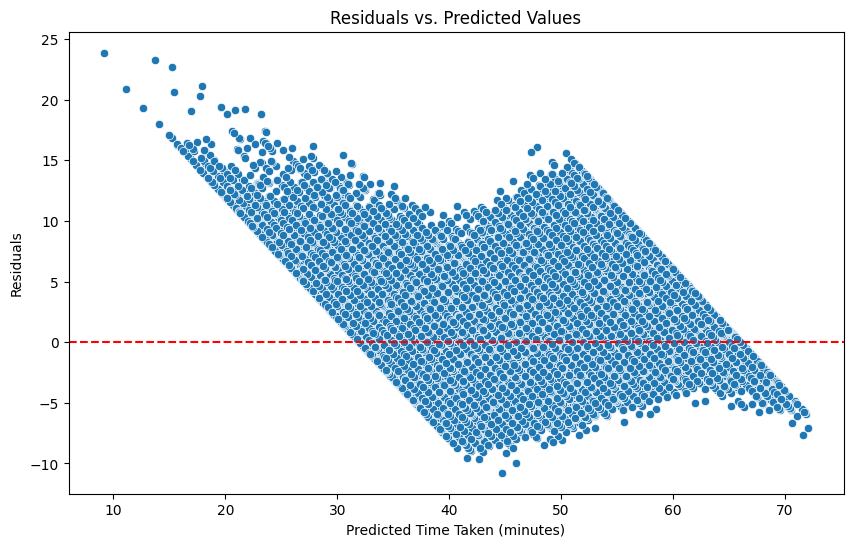

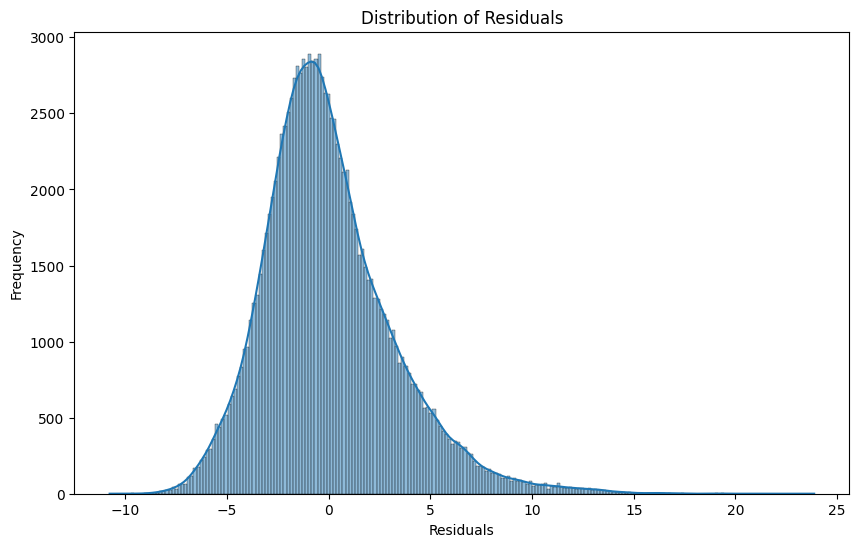

<Figure size 800x600 with 0 Axes>

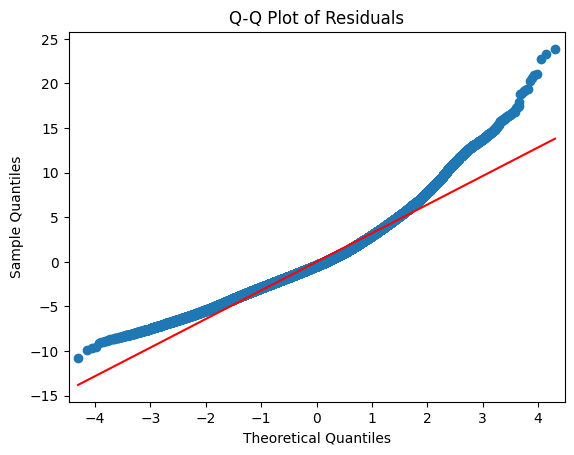

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Predictions on the training data using the final model
y_train_pred_final = final_model.predict(X_train_processed[final_selected_feature_names])

# Residuals
residuals = y_train_cleaned - y_train_pred_final

# 1. Residuals vs. Predicted Values Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred_final, y=residuals)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at zero
plt.xlabel("Predicted Time Taken (minutes)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

# 2. Residual Histogram
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

# 3. Q-Q Plot (Quantile-Quantile Plot)
import statsmodels.api as sm
import scipy.stats as stats

plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s') # 's' draws a standardized line
plt.title("Q-Q Plot of Residuals")
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model

# Get the coefficients from the final model (trained on scaled data)
scaled_coefficients = pd.DataFrame({
    'Feature': final_selected_feature_names,
    'Scaled Coefficient': final_model.coef_
})

# The intercept is not part of the coefficients array
scaled_intercept = final_model.intercept_

print("Scaled Coefficients:")
print(scaled_coefficients)
print(f"\nScaled Intercept: {scaled_intercept:.4f}")

# Get the original (unscaled) features for the final selected columns
X_train_unscaled_selected = X_train_cleaned[final_selected_feature_names]

# Separate numerical and categorical selected features for unscaling logic
final_selected_numerical_cols = X_train_unscaled_selected.select_dtypes(include=np.number).columns.tolist()
final_selected_categorical_cols = X_train_unscaled_selected.select_dtypes(include='category').columns.tolist()

# Retrain a model on the unscaled numerical features and original categorical features
unscaled_model = LinearRegression()
unscaled_model.fit(X_train_unscaled_selected, y_train_cleaned)

# Get the coefficients and intercept from the unscaled model
unscaled_coefficients = pd.DataFrame({
    'Feature': final_selected_feature_names,
    'Unscaled Coefficient': unscaled_model.coef_
})
unscaled_intercept = unscaled_model.intercept_

print("\nUnscaled Coefficients:")
print(unscaled_coefficients)
print(f"\nUnscaled Intercept: {unscaled_intercept:.4f}")

# Merge dataframes
comparison_df = pd.merge(scaled_coefficients, unscaled_coefficients, on='Feature')
print("\nScaled vs Unscaled Coefficients Comparison:")
print(comparison_df)


Scaled Coefficients:
                    Feature  Scaled Coefficient
0               total_items            0.203838
1                  subtotal            2.089316
2     total_onshift_dashers          -11.641116
3        total_busy_dashers           -3.867092
4  total_outstanding_orders           15.468915
5                  distance            4.032271
6               hour_of_day           -2.087295

Scaled Intercept: 44.5684

Unscaled Coefficients:
                    Feature  Unscaled Coefficient
0               total_items              0.138323
1                  subtotal              0.001693
2     total_onshift_dashers             -0.379083
3        total_busy_dashers             -0.134241
4  total_outstanding_orders              0.354198
5                  distance              0.467905
6               hour_of_day             -0.236551

Unscaled Intercept: 34.9128

Scaled vs Unscaled Coefficients Comparison:
                    Feature  Scaled Coefficient  Unscaled Coefficient


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, there are categorical variables in the dataset.
1. store_primary_category: The category of the restaurant
2. order_protocol
3. market_id

The categorical variables appear to have a significant effect on the delivery time. Different categories within each variable likely correspond to distinct distributions of time_taken, suggesting that these factors are important predictors of delivery duration.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> "test_size = 0.2" refers to the proportion of the dataset that will be allocated to the test set during the process of splitting the data (i.e., 20 % of data to test set and 80% data to training set).



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>1. Detection Method (IQR):
Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

2. Data set is filtered, once the outlier bounds were calculated for each numerical column based on the training data.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>distance, total_outstanding_orders, total_onshift_dashers



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear Regression is a fundamental supervised learning algorithm used for predicting a continuous target(dependent) variable based on one or more independent variables.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
Simple Linear Regression:
Uses only one independent variable (feature) to predict the dependent variable.

Multiple Linear Regression:
Uses two or more independent variables (features) to predict the dependent variable.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
The cost function is absolutely central to linear regression. Its role is to quantify how well or how poorly a given set of model parameters (coefficients and intercept) fits the training data.





---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.

Underfitting occurs when a model is too simple or not complex enough to capture the underlying patterns in the training data. The model fails to learn the relationships between the features and the target variable adequate.

Overfitting occurs when a model is too complex and learns the training data too well. Instead of capturing the general underlying patterns, the model essentially memorizes the training data, including its noise and random fluctuations.

**Answer:**

>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
Residual plots are powerful diagnostic tools for linear regression models because they visually highlight how well the model's assumptions are met and reveal potential problems that the model might have in fitting the data